In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

Import some libraries to get things working:
- **NumPy**: Used for numerical computations
- **Matplotlib**: Used for plotting graphs
- **Astropy**: Used for handling units

In [12]:
def decay_model(N0, half_life, time_steps):

    t = np.linspace(0, 10, time_steps) * half_life

    decay_constant = np.log(2) / half_life

    exp_arg = -(decay_constant * t).to_value(u.dimensionless_unscaled)
  
    X_t = N0 * np.exp(exp_arg)

    Y_t = N0 - X_t 

    return t, X_t, Y_t

This function simulates how much of the original element (X) remains and how much of the decay product (Y) forms over time.

- **N0**: The initial amount of the element (in moles).

- **half_life**: The half-life of the element (in seconds).

- **time_steps**: The number of time points we want for the simulation.

Inside the function:

- **t**: An array of time points, ranging from 0 to 10 half-lives (in seconds).

- **decay_constant**: Calculated as the natural log of 2 divided by the half-life of the element. This constant determines how quickly the element decays (in 1/s).

- **exp_arg**: The argument for the exponential function. It must be dimensionless, so we convert it using .to_value(u.dimensionless_unscaled).

- **X_t**: The amount of the original element left at each time step (in moles).

- **Y_t**: The amount of the decay product formed over time (in moles).



In [14]:
N0 = 2.0 * u.mol      
half_life = 10 * u.s  
time_steps = 500      

Here are the parameters for the decay simulation:

- **N0**: Starts with 2.0 moles of the original element.

- **half_life**: The half-life of the element is 10 seconds.

- **time_steps**: Calculated at 500 points to get a smoother curve on graphs.

In [15]:
t, X_t, Y_t = decay_model(N0, half_life, time_steps)

This block runs the decay_model function using the parameters just defined.

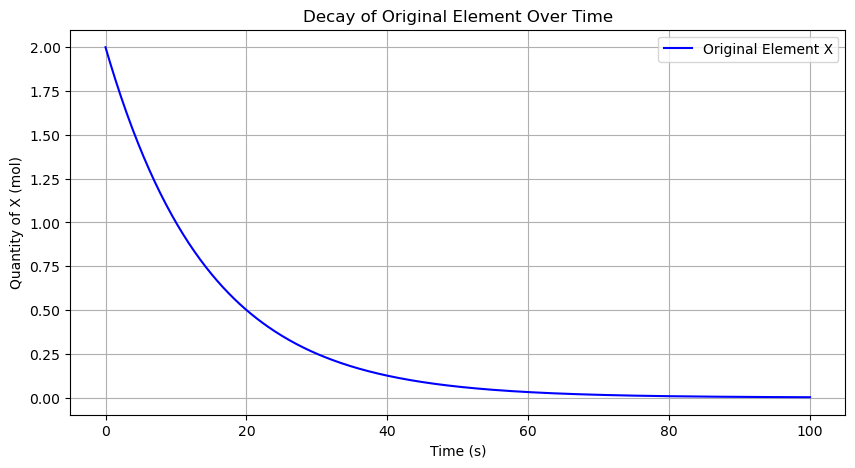

In [17]:
plt.figure(figsize = (10, 5))
plt.plot(t, X_t, label = 'Original Element X', color = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Quantity of X (mol)')
plt.title('Decay of Original Element Over Time')
plt.legend()
plt.grid(True)
plt.show()

This graph shows the decay of the original element, X, over time.

- **X-axis**: Time in seconds.
- **Y-axis**: Quantity of the original element in moles.

The curve shows the classic exponential decay—at the beginning, the quantity drops quickly, and over time it decreases more slowly as we approach zero.

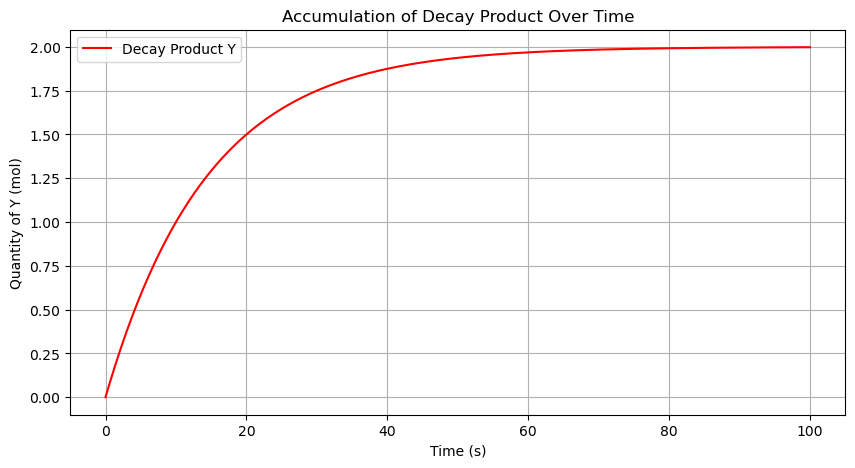

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(t, Y_t, label = 'Decay Product Y', color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Quantity of Y (mol)')
plt.title('Accumulation of Decay Product Over Time')
plt.legend()
plt.grid(True)
plt.show()

This graph shows how the decay product, Y, grows over time.

- **X-axis**: Time in seconds.
- **Y-axis**: Quantity of the decay product in moles.

As the original element decays, the amount of the decay product increases until it levels off. This happens when nearly all of the original element has decayed.

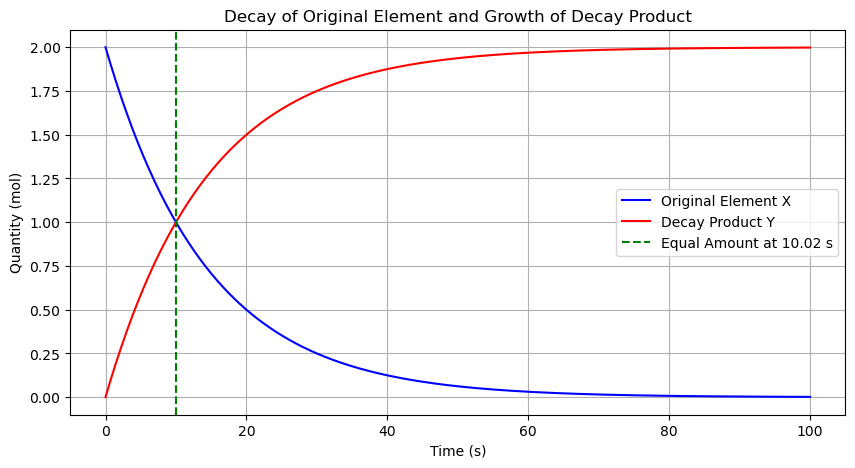

In [21]:
plt.figure(figsize = (10, 5))
plt.plot(t, X_t, label = 'Original Element X', color = 'blue')
plt.plot(t, Y_t, label = 'Decay Product Y', color = 'red')

intersection_time = t[np.abs(X_t - Y_t).argmin()]

plt.axvline(x = intersection_time.value, color = 'green', linestyle = '--', 
            label = f'Equal Amount at {intersection_time:.2f}')

plt.xlabel('Time (s)')
plt.ylabel('Quantity (mol)')
plt.title('Decay of Original Element and Growth of Decay Product')
plt.legend()
plt.grid(True)
plt.show()

This graph shows both the decay of the original element X(t) and the accumulation of the decay product Y(t) over time.

- **Blue Line**: The amount of the original element X(t) decreases exponentially over time.

- **Red Line**: The amount of the decay product Y(t) increases as the original element decays.

- **Green Dashed Line**: This vertical line marks the point where the quantities of X(t) and Y(t) are equal. This happens when half of the original element has decayed, and half has been converted into the product.

This plot helps us see the inverse relationship between the two substances and highlights when the two amounts are the same.